**Table of contents**    
- 1.1. Goal of this project    
  - 1.2. Explaining important indicators    
  - 1.3. Research questions:    
  - 1.4. Importing libraries    
  - 1.5. Reading and exploring the data    
    - 1.5.1. Merging data frames    
    - 1.5.2. NaN values count per column    
    - 1.5.3. Data types    
    - 1.5.4. Descriptive statistics summary    
    - 1.5.5. Changing Date column to date format    
    - 1.5.6. Number of unique values in each column with object data type    
    - 1.5.7. Getting year from each date    
  - 1.6. Analysing air quality    
    - 1.6.1. Groupping the data to get the average value of PM2.5 and PM10 for each state in a given year    
    - 1.6.2. Figure 1 - average PM2.5 in 2020 by state    
    - 1.6.3. Figure 2 - average PM10 in 2020 by state    
    - 1.6.4. Figure 1 - NO2 by state in years 2015-2020    
    - 1.6.5. Getting the median of O3 for each state in years 2015-2020    
    - 1.6.6. Figure 4 - observations of O3 concentrations in the air by state in years 2015-2020    
    - 1.6.7. Getting the median of SO2 for each state in years 2015-2020    
    - 1.6.8. Figure 5 - SO2 concentrations by state in years 2015-2020    
    - 1.6.9. Getting mean AQI for each year    
    - 1.6.10. Figure 6 - mean AQI in years 2015-2020 in India    
    - 1.6.11. Number of AQI classification types in Delhi    
    - 1.6.12. Figure 7 - number of each air quality classification in Delhi in years 2015-2020    
    - 1.6.13. Figure 8 - distribution of Delhi's AQI in years 2015-2020    
    - 1.6.14. Checking correlation between AQI and other indicators    
    - 1.6.15. Conclusions    

<!-- vscode-jupyter-toc-config
	numbering=true
	anchor=false
	flat=false
	minLevel=1
	maxLevel=3
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

## 1.1. Goal of this project

#### The research topic of the project is the formation of air quality in India from 2015 to 2020

## 1.2. Explaining important indicators

#### At the outset, it is necessary to explain what are the indicators that appear in the project:

<h4>1. <b>PM2.5</b> is considered the most dangerous form of air pollution. It is particulate matter (atmospheric aerosol) with a diameter of 2.5 µm, the long-term inhalation of which negatively affects health, shortens life expectancy and contributes to cardiovascular and respiratory diseases. PM2.5 is particularly dangerous (thus, it is one of the most important indicators) because such fine dust enters the blood through the lungs.</h4>

<h4>2. <b>PM10</b> is a dust with a diameter of 10 µm. It is therefore noticeably larger than PM2.5, but is also very harmful. PM10 contains carcinogenic heavy metals (in particular, benzopyrene is highly carcinogenic).</h4>

<h4>3. <b>NO2</b> (nitrogen dioxide). NO2 is distinguished by its pungent odor and brown coloration (this coloration is often seen in smog). In principle, NO2 easily reacts chemically to cause an explosion, but in urban air NO2 does not cause an explosion. High concentrations of nitrogen dioxide in the air can cause, for example, shortness of breath, irritation of the conjunctiva, nasal and throat mucous membranes.</h4>

<h4>4. <b>O3</b> (ozone) is made up of three oxygen atoms. This third atom makes O3 harmful to health. On the one hand, ozone (in the stratosphere) blocks ultraviolet radiation (thanks to ozone, only a fraction of UV rays reach us), but on the other hand, in the troposphere, the lower layer of the atmosphere, especially in high concentrations in the air, it causes, among other things, inflammatory reactions in the eyes and respiratory tract.</h4>

<h4>5. <b>SO2</b> (Sulfur oxide) - their main source is domestic coal-fired boilers. Sulfur is found in fossil fuels (coal, natural gas, oil). In the process of burning them, sulfur combines with oxygen to form sulfur monoxide. Exposure to high concentrations of SO2 in the air can result in upper respiratory tract irritation, bronchitis, and pneumonia.</h4>

<h4>6. <b>CO</b> (carbon monoxide) - is produced in the process of combustion of fuel materials (primarily coal) under conditions of insufficient oxygen. CO found in the air as a component of pollution is not as harmful as Chad emitted, for example, from leaking gas installations (in which case exposure to Chad often ends in poisoning or death), still carbon monoxide in the air causes, among other things, shortness of breath, a state of disorientation, dizziness, sluggishness, memory disorders.</h4>

## 1.3. Research questions:

<h4>1. Has air quality in India as measured by the AQI improved from 2015 to 2020?</h4>
<h4>2. What are the most polluted states in India in terms of PM2.5, PM10 and other indicators?</h4>

## 1.4. Importing libraries

In [221]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statistics
import math
import statsmodels.api as sm

## 1.5. Reading and exploring the data

In [222]:
df = pd.read_csv('station_day.csv')

In [223]:
df.shape

(99721, 16)

In [224]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99721 entries, 0 to 99720
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   StationId   99721 non-null  object 
 1   Date        99721 non-null  object 
 2   PM2.5       78984 non-null  float64
 3   PM10        58700 non-null  float64
 4   NO          83444 non-null  float64
 5   NO2         83957 non-null  float64
 6   NOx         84806 non-null  float64
 7   NH3         53910 non-null  float64
 8   CO          87230 non-null  float64
 9   SO2         75744 non-null  float64
 10  O3          75213 non-null  float64
 11  Benzene     70051 non-null  float64
 12  Toluene     63456 non-null  float64
 13  Xylene      19972 non-null  float64
 14  AQI         79593 non-null  float64
 15  AQI_Bucket  79593 non-null  object 
dtypes: float64(13), object(3)
memory usage: 12.2+ MB


In [225]:
df.head(10)

,StationId,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,AP001,2017-11-24,71.36,115.75,1.75,20.65,12.40,12.19,0.10,10.76,109.26,0.17,5.92,0.10,NaN,NaN
1,AP001,2017-11-25,81.40,124.50,1.44,20.50,12.08,10.72,0.12,15.24,127.09,0.20,6.50,0.06,184.0,Moderate
2,AP001,2017-11-26,78.32,129.06,1.26,26.00,14.85,10.28,0.14,26.96,117.44,0.22,7.95,0.08,197.0,Moderate
3,AP001,2017-11-27,88.76,135.32,6.60,30.85,21.77,12.91,0.11,33.59,111.81,0.29,7.63,0.12,198.0,Moderate
4,AP001,2017-11-28,64.18,104.09,2.56,28.07,17.01,11.42,0.09,19.00,138.18,0.17,5.02,0.07,188.0,Moderate
5,AP001,2017-11-29,72.47,114.84,5.23,23.20,16.59,12.25,0.16,10.55,109.74,0.21,4.71,0.08,173.0,Moderate
6,AP001,2017-11-30,69.80,114.86,4.69,20.17,14.54,10.95,0.12,14.07,118.09,0.16,3.52,0.06,165.0,Moderate
7,AP001,2017-12-01,73.96,113.56,4.58,19.29,13.97,10.95,0.10,13.90,123.80,0.17,2.85,0.04,191.0,Moderate
8,AP001,2017-12-02,89.90,140.20,7.71,26.19,19.87,13.12,0.10,19.37,128.73,0.25,2.79,0.07,191.0,Moderate
9,AP001,2017-12-03,87.14,130.52,0.97,21.31,12.12,14.36,0.15,11.41,114.80,0.23,3.82,0.04,227.0,Poor


#### The df data has quite a lot of NaN values, but before we take a closer look at it, a second dataset will be loaded and then the two datasets will be linked together using a common column

### 1.5.1. Merging data frames

In [226]:
df2 = pd.read_csv('stations.csv')

In [227]:
df2.shape

(230, 5)

In [228]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 230 entries, 0 to 229
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   StationId    230 non-null    object
 1   StationName  230 non-null    object
 2   City         230 non-null    object
 3   State        230 non-null    object
 4   Status       132 non-null    object
dtypes: object(5)
memory usage: 9.1+ KB


In [229]:
df2.head(10)

,StationId,StationName,City,State,Status
0,AP001,"Secretariat, Amaravati - APPCB",Amaravati,Andhra Pradesh,Active
1,AP002,"Anand Kala Kshetram, Rajamahendravaram - APPCB",Rajamahendravaram,Andhra Pradesh,NaN
2,AP003,"Tirumala, Tirupati - APPCB",Tirupati,Andhra Pradesh,NaN
3,AP004,"PWD Grounds, Vijayawada - APPCB",Vijayawada,Andhra Pradesh,NaN
4,AP005,"GVM Corporation, Visakhapatnam - APPCB",Visakhapatnam,Andhra Pradesh,NaN
5,AS001,"Railway Colony, Guwahati - APCB",Guwahati,Assam,Active
6,BR001,"Collectorate, Gaya - BSPCB",Gaya,Bihar,NaN
7,BR002,"SFTI Kusdihra, Gaya - BSPCB",Gaya,Bihar,NaN
8,BR003,"Industrial Area, Hajipur - BSPCB",Hajipur,Bihar,NaN
9,BR004,"Muzaffarpur Collectorate, Muzaffarpur - BSPCB",Muzaffarpur,Bihar,NaN


In [230]:
df_merged = pd.merge(df, df2, on='StationId')

In [231]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99721 entries, 0 to 99720
Data columns (total 20 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   StationId    99721 non-null  object 
 1   Date         99721 non-null  object 
 2   PM2.5        78984 non-null  float64
 3   PM10         58700 non-null  float64
 4   NO           83444 non-null  float64
 5   NO2          83957 non-null  float64
 6   NOx          84806 non-null  float64
 7   NH3          53910 non-null  float64
 8   CO           87230 non-null  float64
 9   SO2          75744 non-null  float64
 10  O3           75213 non-null  float64
 11  Benzene      70051 non-null  float64
 12  Toluene      63456 non-null  float64
 13  Xylene       19972 non-null  float64
 14  AQI          79593 non-null  float64
 15  AQI_Bucket   79593 non-null  object 
 16  StationName  99721 non-null  object 
 17  City         99721 non-null  object 
 18  State        99721 non-null  object 
 19  Stat

### 1.5.2. NaN values count per column

In [232]:
df_merged.isna().sum().sort_values(ascending=False)

Xylene         79749
NH3            45811
PM10           41021
Toluene        36265
Benzene        29670
O3             24508
SO2            23977
PM2.5          20737
AQI            20128
AQI_Bucket     20128
NO             16277
NO2            15764
NOx            14915
CO             12491
Status           202
Date               0
StationName        0
City               0
State              0
StationId          0
dtype: int64

In [233]:
df_merged.head(10)

,StationId,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket,StationName,City,State,Status
0,AP001,2017-11-24,71.36,115.75,1.75,20.65,12.40,12.19,0.10,10.76,109.26,0.17,5.92,0.10,NaN,NaN,"Secretariat, Amaravati - APPCB",Amaravati,Andhra Pradesh,Active
1,AP001,2017-11-25,81.40,124.50,1.44,20.50,12.08,10.72,0.12,15.24,127.09,0.20,6.50,0.06,184.0,Moderate,"Secretariat, Amaravati - APPCB",Amaravati,Andhra Pradesh,Active
2,AP001,2017-11-26,78.32,129.06,1.26,26.00,14.85,10.28,0.14,26.96,117.44,0.22,7.95,0.08,197.0,Moderate,"Secretariat, Amaravati - APPCB",Amaravati,Andhra Pradesh,Active
3,AP001,2017-11-27,88.76,135.32,6.60,30.85,21.77,12.91,0.11,33.59,111.81,0.29,7.63,0.12,198.0,Moderate,"Secretariat, Amaravati - APPCB",Amaravati,Andhra Pradesh,Active
4,AP001,2017-11-28,64.18,104.09,2.56,28.07,17.01,11.42,0.09,19.00,138.18,0.17,5.02,0.07,188.0,Moderate,"Secretariat, Amaravati - APPCB",Amaravati,Andhra Pradesh,Active
5,AP001,2017-11-29,72.47,114.84,5.23,23.20,16.59,12.25,0.16,10.55,109.74,0.21,4.71,0.08,173.0,Moderate,"Secretariat, Amaravati - APPCB",Amaravati,Andhra Pradesh,Active
6,AP001,2017-11-30,69.80,114.86,4.69,20.17,14.54,10.95,0.12,14.07,118.09,0.16,3.52,0.06,165.0,Moderate,"Secretariat, Amaravati - APPCB",Amaravati,Andhra Pradesh,Active
7,AP001,2017-12-01,73.96,113.56,4.58,19.29,13.97,10.95,0.10,13.90,123.80,0.17,2.85,0.04,191.0,Moderate,"Secretariat, Amaravati - APPCB",Amaravati,Andhra Pradesh,Active
8,AP001,2017-12-02,89.90,140.20,7.71,26.19,19.87,13.12,0.10,19.37,128.73,0.25,2.79,0.07,191.0,Moderate,"Secretariat, Amaravati - APPCB",Amaravati,Andhra Pradesh,Active
9,AP001,2017-12-03,87.14,130.52,0.97,21.31,12.12,14.36,0.15,11.41,114.80,0.23,3.82,0.04,227.0,Poor,"Secretariat, Amaravati - APPCB",Amaravati,Andhra Pradesh,Active


#### The columns Xylene, Toluene, NH3, NO and NOx are not needed for further analysis (they are less important indicators) so they can be sort out from the dataframe df_merged

In [234]:
df_merged = df_merged.loc[:,~df_merged.columns.isin(['Xylene','Toluene','NH3','NO','NOx','Benzene'])]

#### NaN values count per column after deleting these columns

In [235]:
df_merged.isna().sum().sort_values(ascending=False)

PM10           41021
O3             24508
SO2            23977
PM2.5          20737
AQI            20128
AQI_Bucket     20128
NO2            15764
CO             12491
Status           202
StationId          0
Date               0
StationName        0
City               0
State              0
dtype: int64

#### NaN values will be removed because the information from the columns left in df_merged will be needed

In [236]:
df_merged = df_merged.dropna(how='any')

In [237]:
df_merged.head(10)

,StationId,Date,PM2.5,PM10,NO2,CO,SO2,O3,AQI,AQI_Bucket,StationName,City,State,Status
1,AP001,2017-11-25,81.40,124.50,20.50,0.12,15.24,127.09,184.0,Moderate,"Secretariat, Amaravati - APPCB",Amaravati,Andhra Pradesh,Active
2,AP001,2017-11-26,78.32,129.06,26.00,0.14,26.96,117.44,197.0,Moderate,"Secretariat, Amaravati - APPCB",Amaravati,Andhra Pradesh,Active
3,AP001,2017-11-27,88.76,135.32,30.85,0.11,33.59,111.81,198.0,Moderate,"Secretariat, Amaravati - APPCB",Amaravati,Andhra Pradesh,Active
4,AP001,2017-11-28,64.18,104.09,28.07,0.09,19.00,138.18,188.0,Moderate,"Secretariat, Amaravati - APPCB",Amaravati,Andhra Pradesh,Active
5,AP001,2017-11-29,72.47,114.84,23.20,0.16,10.55,109.74,173.0,Moderate,"Secretariat, Amaravati - APPCB",Amaravati,Andhra Pradesh,Active
6,AP001,2017-11-30,69.80,114.86,20.17,0.12,14.07,118.09,165.0,Moderate,"Secretariat, Amaravati - APPCB",Amaravati,Andhra Pradesh,Active
7,AP001,2017-12-01,73.96,113.56,19.29,0.10,13.90,123.80,191.0,Moderate,"Secretariat, Amaravati - APPCB",Amaravati,Andhra Pradesh,Active
8,AP001,2017-12-02,89.90,140.20,26.19,0.10,19.37,128.73,191.0,Moderate,"Secretariat, Amaravati - APPCB",Amaravati,Andhra Pradesh,Active
9,AP001,2017-12-03,87.14,130.52,21.31,0.15,11.41,114.80,227.0,Poor,"Secretariat, Amaravati - APPCB",Amaravati,Andhra Pradesh,Active
10,AP001,2017-12-04,84.64,125.00,26.98,0.18,9.84,112.41,168.0,Moderate,"Secretariat, Amaravati - APPCB",Amaravati,Andhra Pradesh,Active


### 1.5.3. Data types

In [238]:
df_merged.dtypes

StationId       object
Date            object
PM2.5          float64
PM10           float64
NO2            float64
CO             float64
SO2            float64
O3             float64
AQI            float64
AQI_Bucket      object
StationName     object
City            object
State           object
Status          object
dtype: object

### 1.5.4. Descriptive statistics summary

In [239]:
df_merged.describe().round(2)

,PM2.5,PM10,NO2,CO,SO2,O3,AQI
count,44635.00,44635.00,44635.00,44635.00,44635.00,44635.00,44635.00
mean,81.16,166.64,39.89,1.30,12.86,41.42,185.90
std,77.19,128.75,30.60,2.23,11.19,48.00,128.94
min,0.15,0.18,0.01,0.00,0.01,0.03,14.00
25%,32.04,74.04,17.87,0.59,6.02,19.02,92.00
50%,56.92,128.58,32.73,0.94,10.44,32.02,140.00
75%,99.98,221.79,54.01,1.48,16.40,50.58,264.00
max,868.66,976.77,397.31,92.96,186.08,963.00,1389.00


#### Note that the Date column is loaded as an object. It should be changed to date

In [240]:
df_merged.dtypes

StationId       object
Date            object
PM2.5          float64
PM10           float64
NO2            float64
CO             float64
SO2            float64
O3             float64
AQI            float64
AQI_Bucket      object
StationName     object
City            object
State           object
Status          object
dtype: object

### 1.5.5. Changing Date column to date format

In [241]:
df_merged['Date'] = pd.to_datetime(df_merged['Date'])

In [242]:
df_merged.head(5)

,StationId,Date,PM2.5,PM10,NO2,CO,SO2,O3,AQI,AQI_Bucket,StationName,City,State,Status
1,AP001,2017-11-25,81.40,124.50,20.50,0.12,15.24,127.09,184.0,Moderate,"Secretariat, Amaravati - APPCB",Amaravati,Andhra Pradesh,Active
2,AP001,2017-11-26,78.32,129.06,26.00,0.14,26.96,117.44,197.0,Moderate,"Secretariat, Amaravati - APPCB",Amaravati,Andhra Pradesh,Active
3,AP001,2017-11-27,88.76,135.32,30.85,0.11,33.59,111.81,198.0,Moderate,"Secretariat, Amaravati - APPCB",Amaravati,Andhra Pradesh,Active
4,AP001,2017-11-28,64.18,104.09,28.07,0.09,19.00,138.18,188.0,Moderate,"Secretariat, Amaravati - APPCB",Amaravati,Andhra Pradesh,Active
5,AP001,2017-11-29,72.47,114.84,23.20,0.16,10.55,109.74,173.0,Moderate,"Secretariat, Amaravati - APPCB",Amaravati,Andhra Pradesh,Active


### 1.5.6. Number of unique values in each column with object data type

In [243]:
objects_list = df_merged.select_dtypes('object').columns.to_list()

In [244]:
for i in objects_list:
    unique_val = df_merged[i].nunique()
    print(f'{i}: unique values = {unique_val}')

StationId: unique values = 77
AQI_Bucket: unique values = 6
StationName: unique values = 77
City: unique values = 21
State: unique values = 20
Status: unique values = 1


### 1.5.7. Getting year from each date

In [245]:
df_merged['Year'] = df_merged['Date'].dt.year

In [246]:
df_merged.loc[:,['Year','Date']]

,Year,Date
1,2017,2017-11-25
2,2017,2017-11-26
3,2017,2017-11-27
4,2017,2017-11-28
5,2017,2017-11-29
...,...,...
99716,2020,2020-04-27
99717,2020,2020-04-28
99718,2020,2020-04-29
99719,2020,2020-04-30


## 1.6. Analysing air quality

### 1.6.1. Groupping the data to get the average value of PM2.5 and PM10 for each state in a given year

In [247]:
df_merged_pm = df_merged.groupby(['State','Year'])[['PM2.5','PM10']].mean().reset_index().sort_values(['PM2.5'],ascending = False).reset_index(drop=True)

In [248]:
df_merged_pm

,State,Year,PM2.5,PM10
0,Delhi,2017,197.794338,362.103401
1,Delhi,2016,134.013359,262.422265
2,Delhi,2015,125.385056,257.699598
3,Delhi,2018,116.525166,247.966801
4,Bihar,2019,112.346154,201.233077
5,Delhi,2019,110.080952,220.489939
6,Delhi,2020,104.039301,181.705844
7,Odisha,2017,101.660000,158.897000
8,Assam,2020,100.559504,170.830413
9,West Bengal,2018,96.799526,157.540632


#### Rounding values

In [249]:
df_merged_pm['PM2.5'] = round(df_merged_pm['PM2.5'],2)
df_merged_pm['PM10'] = round(df_merged_pm['PM10'],2)

In [250]:
df_merged_pm

,State,Year,PM2.5,PM10
0,Delhi,2017,197.79,362.10
1,Delhi,2016,134.01,262.42
2,Delhi,2015,125.39,257.70
3,Delhi,2018,116.53,247.97
4,Bihar,2019,112.35,201.23
5,Delhi,2019,110.08,220.49
6,Delhi,2020,104.04,181.71
7,Odisha,2017,101.66,158.90
8,Assam,2020,100.56,170.83
9,West Bengal,2018,96.80,157.54


#### A filter has been imposed for 2020 to check the most current state of the air quality

In [251]:
df_merged_pm[df_merged_pm['Year']==2020]

,State,Year,PM2.5,PM10
6,Delhi,2020,104.04,181.71
8,Assam,2020,100.56,170.83
10,Odisha,2020,84.62,154.60
16,Bihar,2020,64.14,154.82
17,West Bengal,2020,63.69,124.88
21,Haryana,2020,56.10,113.67
27,Maharashtra,2020,51.60,128.06
29,Gujarat,2020,50.93,111.13
30,Madhya Pradesh,2020,50.82,126.28
34,Jharkhand,2020,47.75,105.69


### 1.6.2. Figure 1 - average PM2.5 in 2020 by state

#### An important observation is that in terms of this indicator, Delhi is the most polluted state.

Text(0.5, 1.0, 'Mean PM2.5 by State in 2020')

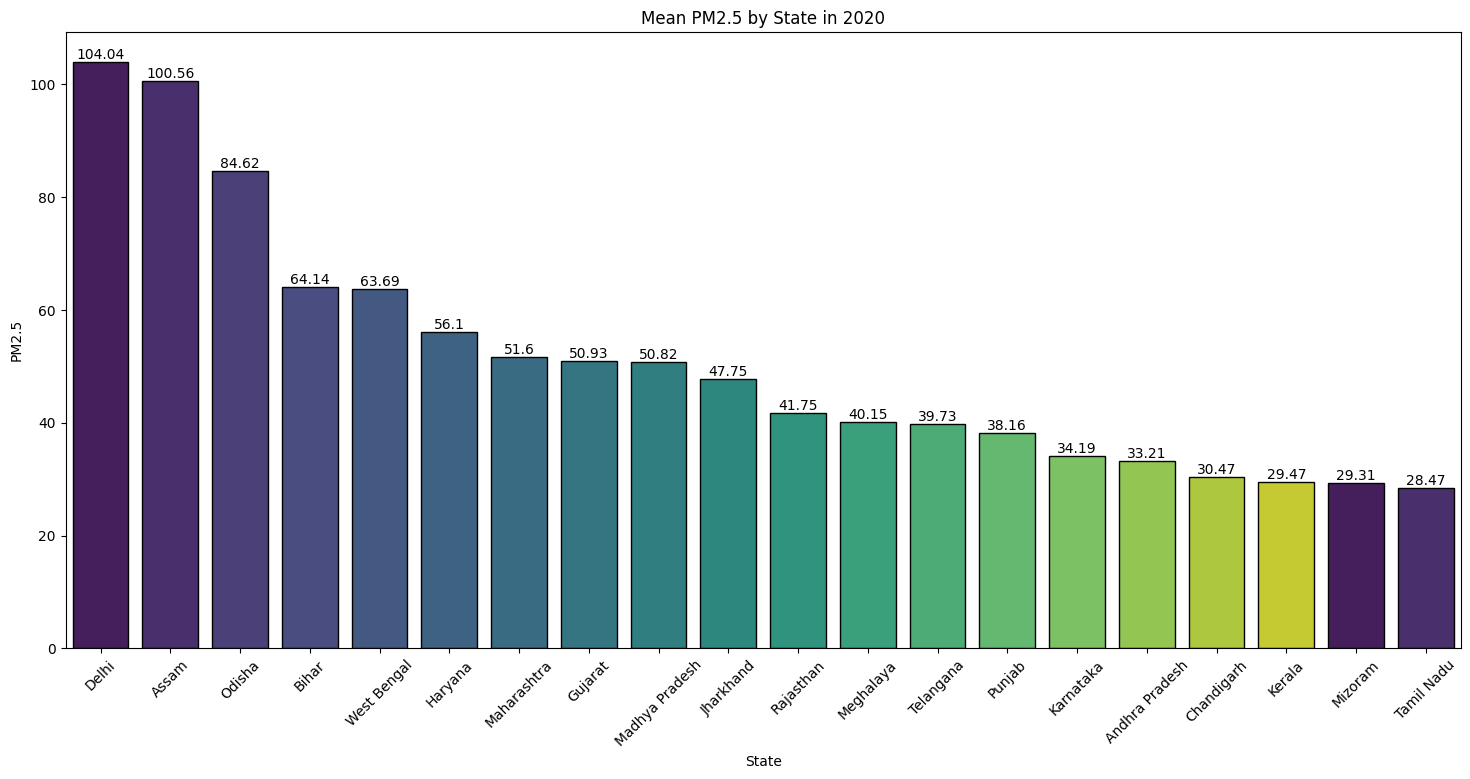

In [252]:
plt.figure(
    figsize=(18,8)
    )
bar = sns.barplot(
    data=df_merged_pm[df_merged_pm['Year']==2020],
    y='PM2.5',
    x='State',
    palette = sns.color_palette('viridis',18),
    edgecolor='black'
    )
plt.bar_label(bar.containers[0])
plt.xticks(rotation=45)
plt.title('Mean PM2.5 by State in 2020')


### 1.6.3. Figure 2 - average PM10 in 2020 by state

#### In this case Delhi presents the highest values as well

Text(0.5, 1.0, 'Mean PM10 by State in 2020')

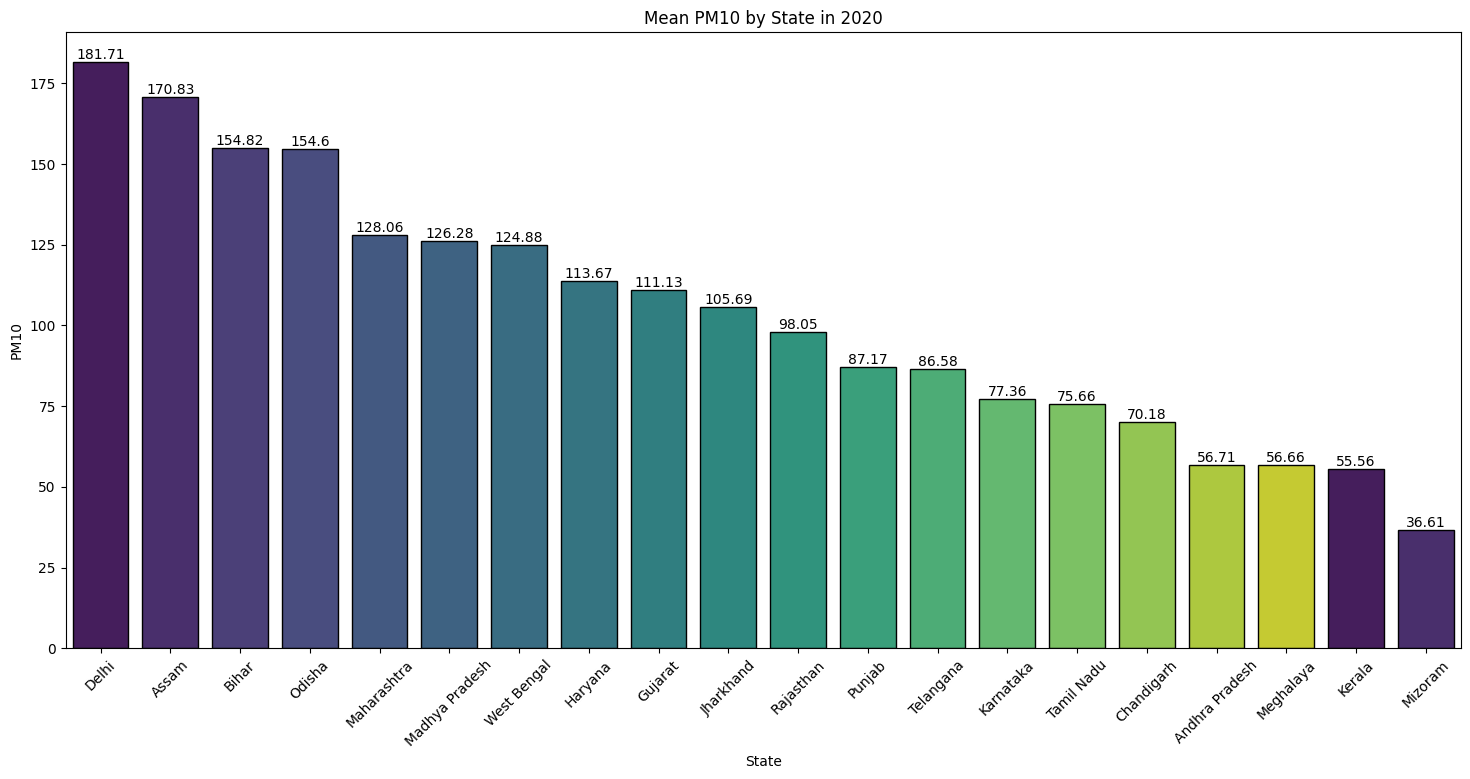

In [253]:
plt.figure(
    figsize=(18,8)
    )
bar = sns.barplot(
    data=df_merged_pm[df_merged_pm['Year']==2020].sort_values(['PM10'],ascending=False),
    y='PM10',
    x='State',
    palette = sns.color_palette('viridis',18),
    edgecolor='black'
    )
plt.bar_label(bar.containers[0])
plt.xticks(rotation=45)
plt.title('Mean PM10 by State in 2020')

In [254]:
df_merged.head(10)

,StationId,Date,PM2.5,PM10,NO2,CO,SO2,O3,AQI,AQI_Bucket,StationName,City,State,Status,Year
1,AP001,2017-11-25,81.40,124.50,20.50,0.12,15.24,127.09,184.0,Moderate,"Secretariat, Amaravati - APPCB",Amaravati,Andhra Pradesh,Active,2017
2,AP001,2017-11-26,78.32,129.06,26.00,0.14,26.96,117.44,197.0,Moderate,"Secretariat, Amaravati - APPCB",Amaravati,Andhra Pradesh,Active,2017
3,AP001,2017-11-27,88.76,135.32,30.85,0.11,33.59,111.81,198.0,Moderate,"Secretariat, Amaravati - APPCB",Amaravati,Andhra Pradesh,Active,2017
4,AP001,2017-11-28,64.18,104.09,28.07,0.09,19.00,138.18,188.0,Moderate,"Secretariat, Amaravati - APPCB",Amaravati,Andhra Pradesh,Active,2017
5,AP001,2017-11-29,72.47,114.84,23.20,0.16,10.55,109.74,173.0,Moderate,"Secretariat, Amaravati - APPCB",Amaravati,Andhra Pradesh,Active,2017
6,AP001,2017-11-30,69.80,114.86,20.17,0.12,14.07,118.09,165.0,Moderate,"Secretariat, Amaravati - APPCB",Amaravati,Andhra Pradesh,Active,2017
7,AP001,2017-12-01,73.96,113.56,19.29,0.10,13.90,123.80,191.0,Moderate,"Secretariat, Amaravati - APPCB",Amaravati,Andhra Pradesh,Active,2017
8,AP001,2017-12-02,89.90,140.20,26.19,0.10,19.37,128.73,191.0,Moderate,"Secretariat, Amaravati - APPCB",Amaravati,Andhra Pradesh,Active,2017
9,AP001,2017-12-03,87.14,130.52,21.31,0.15,11.41,114.80,227.0,Poor,"Secretariat, Amaravati - APPCB",Amaravati,Andhra Pradesh,Active,2017
10,AP001,2017-12-04,84.64,125.00,26.98,0.18,9.84,112.41,168.0,Moderate,"Secretariat, Amaravati - APPCB",Amaravati,Andhra Pradesh,Active,2017


#### The data was grouped to get information on how many times NO2, CO, SO2 observations occurred in df_merged for each state. This will be used to filter out the states that occurred the fewest times (less than 200)

#### To sort the chart, the variable my_order was created (for later charts, the variables my_order2 and my_order3 were created)</h6>

In [255]:
df_merged.groupby(['State'])[['NO2','CO','SO2']].count().reset_index().sort_values('SO2',ascending=False)

,State,NO2,CO,SO2
4,Delhi,22422,22422,22422
18,Telangana,5207,5207,5207
11,Maharashtra,3111,3111,3111
8,Karnataka,2837,2837,2837
16,Rajasthan,2713,2713,2713
19,West Bengal,2563,2563,2563
14,Odisha,1125,1125,1125
9,Kerala,1051,1051,1051
15,Punjab,760,760,760
0,Andhra Pradesh,754,754,754


#### Getting the median of N02 for each state in years 2015-2020

In [256]:
my_order = df_merged[~df_merged['State'].isin(['Jharkhand','Mizoram','Meghalaya','Haryana'])].groupby(['State'])['NO2'].median()

In [257]:
my_order = my_order.reset_index().sort_values('NO2').reset_index(drop=True)

In [258]:
my_order

,State,NO2
0,Kerala,7.670
1,Tamil Nadu,8.295
2,Chandigarh,11.910
3,Odisha,12.620
4,Assam,12.650
5,Punjab,13.005
6,Andhra Pradesh,16.450
7,Maharashtra,19.760
8,Karnataka,25.780
9,Telangana,28.360


In [259]:
my_order['State'].to_list()

['Kerala',
 'Tamil Nadu',
 'Chandigarh',
 'Odisha',
 'Assam',
 'Punjab',
 'Andhra Pradesh',
 'Maharashtra',
 'Karnataka',
 'Telangana',
 'Rajasthan',
 'West Bengal',
 'Madhya Pradesh',
 'Bihar',
 'Delhi',
 'Gujarat']

### 1.6.4. Figure 1 - NO2 by state in years 2015-2020

Text(0.5, 1.0, 'NO2 Observations by State in Years 2015-2020')

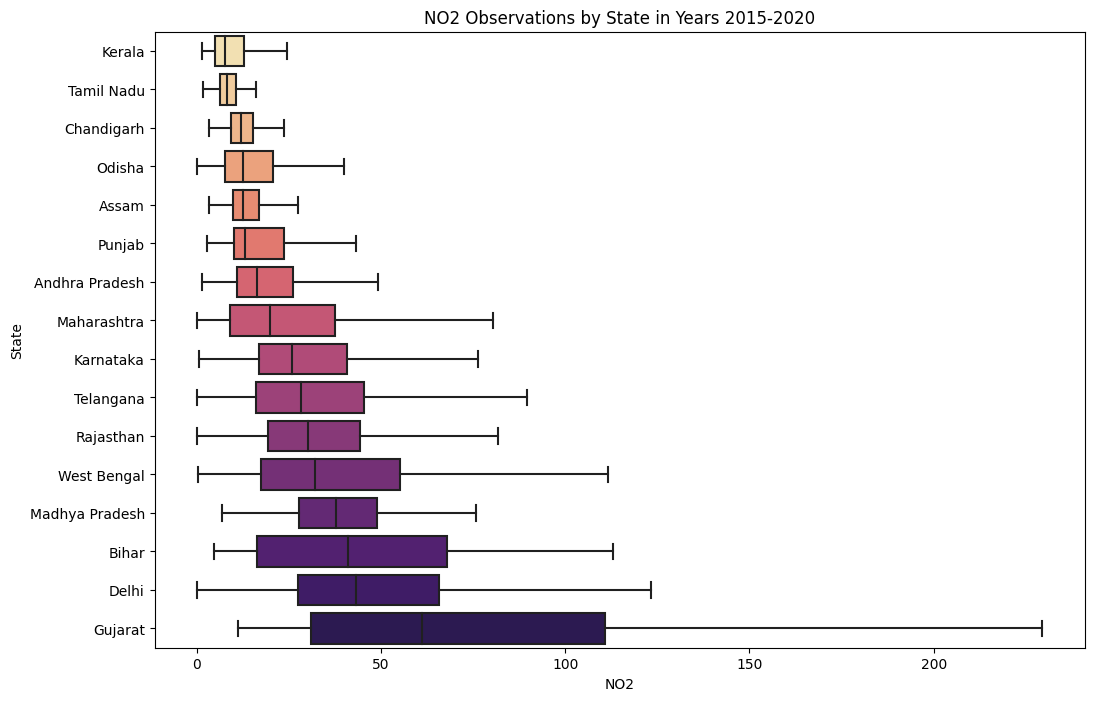

In [260]:
plt.figure(figsize=(12,8))
sns.boxplot(
    data=df_merged,
    y='State',
    x='NO2',
    showfliers = False,
    order=['Kerala','Tamil Nadu','Chandigarh','Odisha',
    'Assam','Punjab','Andhra Pradesh','Maharashtra',
    'Karnataka','Telangana','Rajasthan','West Bengal',
    'Madhya Pradesh','Bihar','Delhi','Gujarat'],
    palette=sns.color_palette('magma_r',18))
plt.title('NO2 Observations by State in Years 2015-2020')

### 1.6.5. Getting the median of O3 for each state in years 2015-2020

In [261]:
my_order2 = df_merged[~df_merged['State'].isin(['Jharkhand','Mizoram','Meghalaya','Haryana'])].groupby(['State'])['O3'].median()
my_order2 = my_order2.reset_index().sort_values('O3').reset_index(drop=True)
my_order2

,State,O3
0,Bihar,6.450
1,Odisha,10.800
2,Chandigarh,13.700
3,Assam,18.600
4,Punjab,20.160
5,Maharashtra,20.390
6,Telangana,30.980
7,West Bengal,31.000
8,Andhra Pradesh,33.005
9,Delhi,33.880


In [262]:
my_order2['State'].to_list()

['Bihar',
 'Odisha',
 'Chandigarh',
 'Assam',
 'Punjab',
 'Maharashtra',
 'Telangana',
 'West Bengal',
 'Andhra Pradesh',
 'Delhi',
 'Karnataka',
 'Kerala',
 'Gujarat',
 'Rajasthan',
 'Tamil Nadu',
 'Madhya Pradesh']

### 1.6.6. Figure 4 - observations of O3 concentrations in the air by state in years 2015-2020

Text(0.5, 1.0, 'O3 Observations by State in Years 2015-2020')

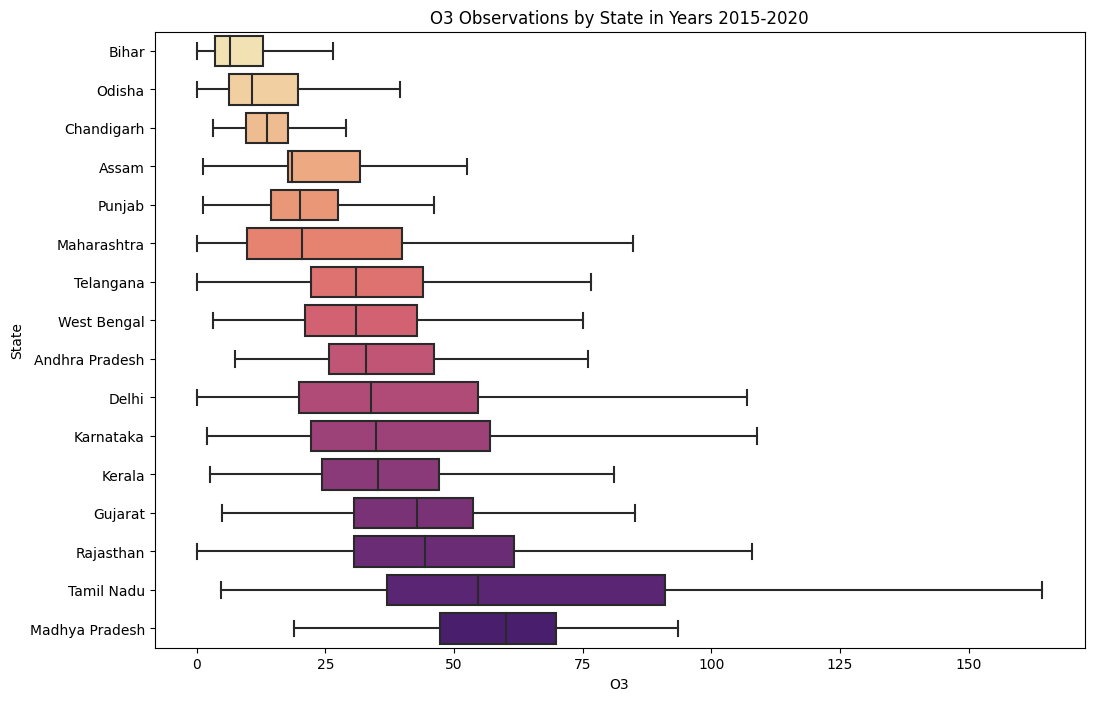

In [263]:
plt.figure(figsize=(12,8))
sns.boxplot(
    data=df_merged,
    y='State',
    x='O3',
    showfliers = False,
    order=['Bihar','Odisha','Chandigarh',
    'Assam','Punjab','Maharashtra',
    'Telangana','West Bengal','Andhra Pradesh','Delhi',
    'Karnataka','Kerala','Gujarat','Rajasthan',
    'Tamil Nadu','Madhya Pradesh'],
    palette=sns.color_palette('magma_r',20))
plt.title('O3 Observations by State in Years 2015-2020')

### 1.6.7. Getting the median of SO2 for each state in years 2015-2020

In [264]:
my_order3 = df_merged[~df_merged['State'].isin(['Jharkhand','Mizoram','Meghalaya','Haryana'])].groupby(['State'])['SO2'].median()
my_order3 = my_order3.reset_index().sort_values('SO2').reset_index(drop=True)
my_order3

,State,SO2
0,Karnataka,5.090
1,Kerala,5.220
2,Telangana,5.990
3,Punjab,6.525
4,Bihar,7.170
5,West Bengal,7.530
6,Tamil Nadu,9.120
7,Maharashtra,9.400
8,Chandigarh,9.610
9,Rajasthan,10.550


In [265]:
my_order3['State'].to_list()

['Karnataka',
 'Kerala',
 'Telangana',
 'Punjab',
 'Bihar',
 'West Bengal',
 'Tamil Nadu',
 'Maharashtra',
 'Chandigarh',
 'Rajasthan',
 'Madhya Pradesh',
 'Delhi',
 'Andhra Pradesh',
 'Assam',
 'Odisha',
 'Gujarat']

### 1.6.8. Figure 5 - SO2 concentrations by state in years 2015-2020

Text(0.5, 1.0, 'SO2 Observations by State in Years 2015-2020')

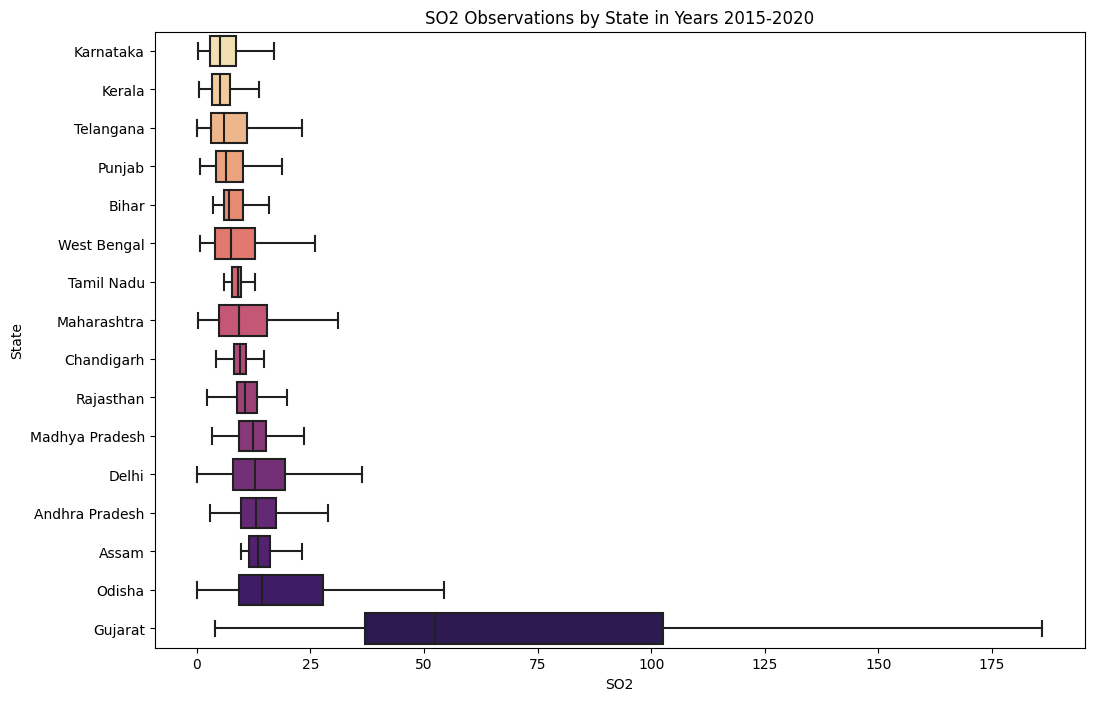

In [266]:
plt.figure(figsize=(12,8))
sns.boxplot(
    data=df_merged,
    y='State',
    x='SO2',
    showfliers = False,
    order=['Karnataka','Kerala','Telangana',
    'Punjab','Bihar','West Bengal','Tamil Nadu',
    'Maharashtra','Chandigarh','Rajasthan','Madhya Pradesh',
    'Delhi','Andhra Pradesh','Assam',
    'Odisha','Gujarat'],
    palette=sns.color_palette('magma_r',18))
plt.title('SO2 Observations by State in Years 2015-2020')

### 1.6.9. Getting mean AQI for each year

In [267]:
df_merged_aqi = df_merged.groupby(['Year'])['AQI'].mean().reset_index().round(2)

In [268]:
df_merged_aqi

,Year,AQI
0,2015,296.17
1,2016,268.27
2,2017,187.24
3,2018,200.65
4,2019,174.22
5,2020,163.00


### 1.6.10. Figure 6 - mean AQI in years 2015-2020 in India

#### The chart below shows that India's air quality, while generally very poor, has been improving since 2015

Text(0.5, 1.0, 'Mean AQI in India in Years 2015-2020')

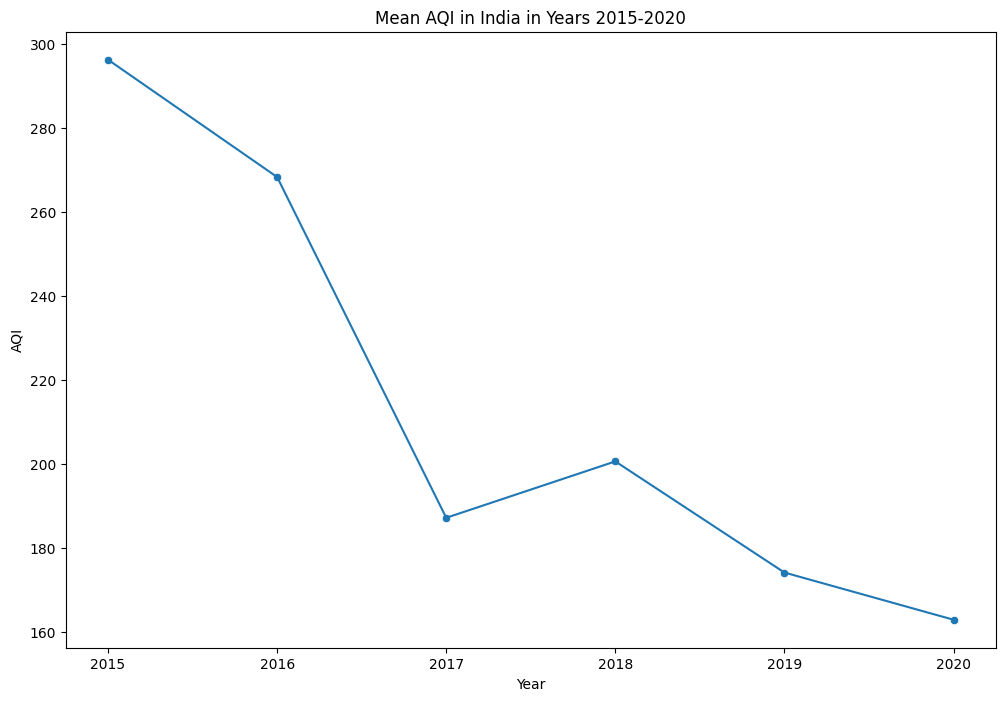

In [269]:
plt.figure(figsize=(12,8))
sns.lineplot(
    data=df_merged_aqi,
    x='Year',
    y='AQI')
sns.scatterplot(
    data=df_merged_aqi,
    x='Year',
    y='AQI'
)
plt.title('Mean AQI in India in Years 2015-2020')

#### Since the state of Delhi is the most polluted in terms of PM2.5 and PM10 (these indicators are considered the most relevant), much attention was paid to the development of air quality in the state:

#### * The number of times each air quality classification (e.g., good, bad, moderate) occurred in a given year was shown.
#### * The distribution of the AQI index in that state was checked

### 1.6.11. Number of AQI classification types in Delhi

In [270]:
df_merged_aqi_bucket = df_merged.value_counts(['Year','State','AQI_Bucket']).reset_index(name='count')

In [271]:
df_merged_aqi_bucket

,Year,State,AQI_Bucket,count
0,2019,Delhi,Moderate,3235
1,2018,Delhi,Moderate,2164
2,2019,Delhi,Poor,2039
3,2019,Delhi,Very Poor,1913
4,2018,Delhi,Very Poor,1912
...,...,...,...,...
263,2018,Maharashtra,Very Poor,1
264,2019,Madhya Pradesh,Good,1
265,2018,Maharashtra,Good,1
266,2019,Meghalaya,Moderate,1


### 1.6.12. Figure 7 - number of each air quality classification in Delhi in years 2015-2020

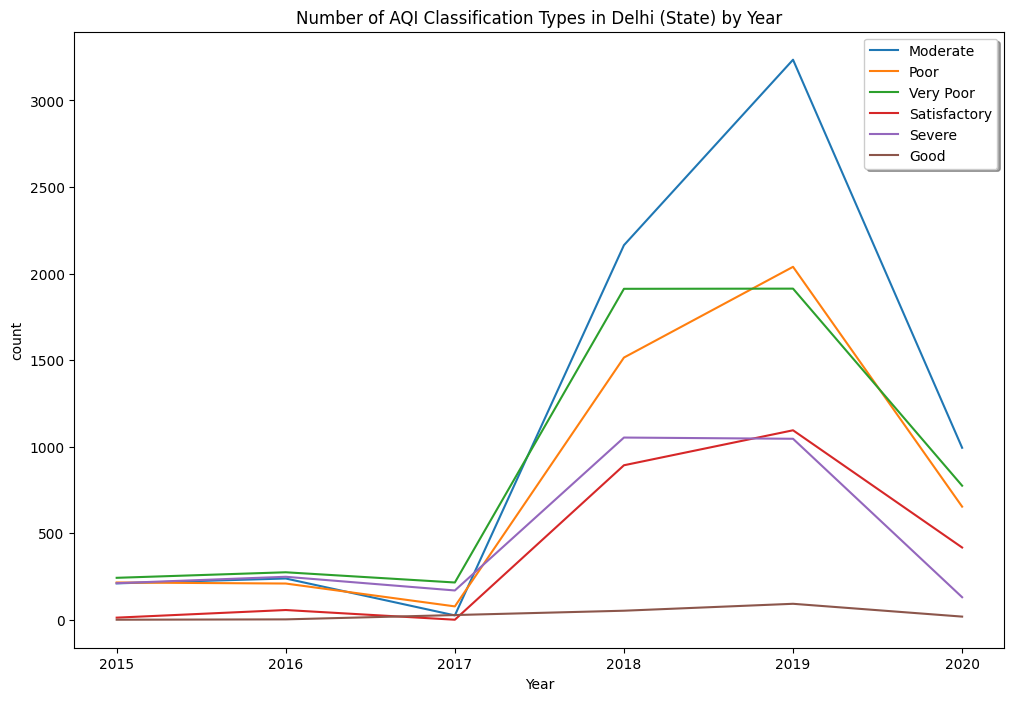

In [272]:
plt.figure(figsize=(12,8))
sns.lineplot(
    data=df_merged_aqi_bucket[df_merged_aqi_bucket['State']=='Delhi'],
    x='Year',
    y='count',
    hue='AQI_Bucket'
    )
plt.title('Number of AQI Classification Types in Delhi (State) by Year')
plt.legend(shadow=True)

### 1.6.13. Figure 8 - distribution of Delhi's AQI in years 2015-2020

Text(0.5, 1.0, 'Distribution of Delhi AQI by Year')

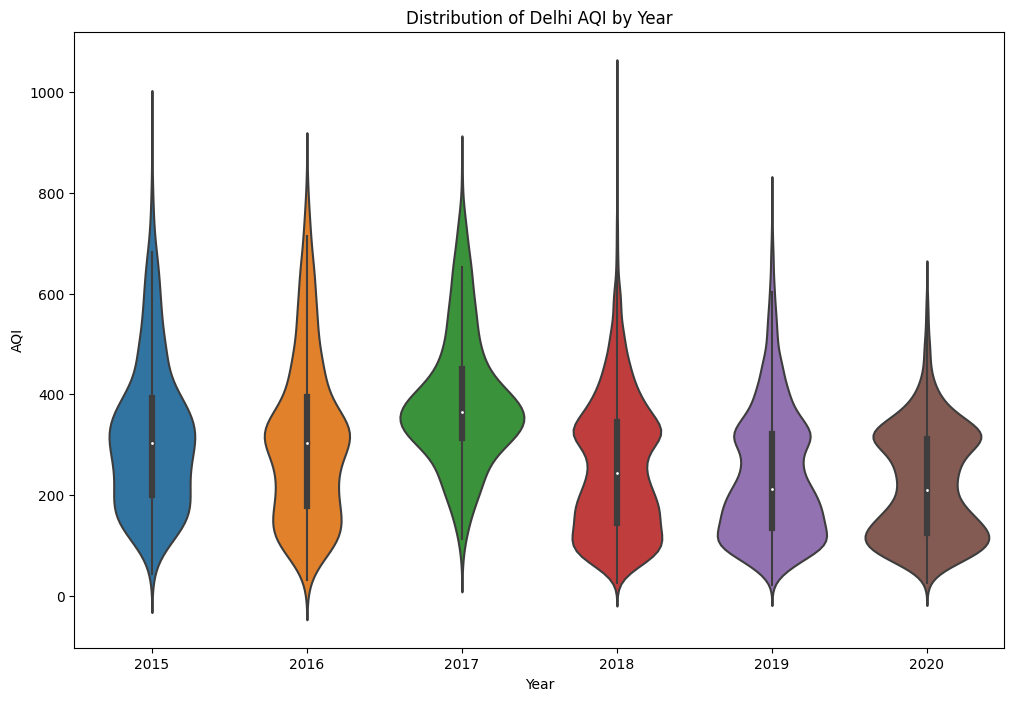

In [273]:
plt.figure(figsize=(12,8))
sns.violinplot(
    data=df_merged[df_merged['State']=='Delhi'],
    x='Year',
    y='AQI',
)
plt.title('Distribution of Delhi AQI by Year')

### 1.6.14. Checking correlation between AQI and other indicators

In [274]:
df_merged.corr().round(2)

C:\Users\piotr\AppData\Local\Temp\ipykernel_15880\910036797.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_merged.corr().round(2)


,PM2.5,PM10,NO2,CO,SO2,O3,AQI,Year
PM2.5,1.00,0.86,0.55,0.22,0.24,0.16,0.87,-0.13
PM10,0.86,1.00,0.54,0.21,0.28,0.04,0.88,-0.18
NO2,0.55,0.54,1.00,0.30,0.33,0.25,0.59,-0.20
CO,0.22,0.21,0.30,1.00,0.46,0.05,0.41,-0.04
SO2,0.24,0.28,0.33,0.46,1.00,0.15,0.37,-0.10
O3,0.16,0.04,0.25,0.05,0.15,1.00,0.21,-0.18
AQI,0.87,0.88,0.59,0.41,0.37,0.21,1.00,-0.19
Year,-0.13,-0.18,-0.20,-0.04,-0.10,-0.18,-0.19,1.00


In [275]:
for i in ['PM2.5','PM10','NO2','CO','SO2','O3']:
    correlation = statistics.correlation(df_merged[i],df_merged['AQI'])
    print(f'correlation between {i} and AQI =  {round(correlation,2)}')

correlation between PM2.5 and AQI =  0.87
correlation between PM10 and AQI =  0.88
correlation between NO2 and AQI =  0.59
correlation between CO and AQI =  0.41
correlation between SO2 and AQI =  0.37
correlation between O3 and AQI =  0.21


#### As previously indicated, PM2.5 and PM10 are the most important factors when it comes to analysing the AQI score

### 1.6.15. Conclusions
<h4>1. AQI is highly correlated with PM2.5, PM10, NO2</h4>

<h4>2. Delhi exhibits the worst air quality in India in terms of PM2.5 and PM10</h4>

<h4>3. Gujarat exhibits the worst air quality in India in terms of NO2 and SO2</h4>

<h4>4. Madhya Pradesh exhibits the worst air quality in India in terms of O3</h4>

<h4>5. In general the air quality in India has improved since 2015</h4>

<h4>6. Starting from 2017, there was a rise in the number of the measurement stations because the number of air quality classification has risen significantly since then</h4>